In [1]:
# mike babb
# 2024 06 28
# what streets start and stop?

In [2]:
# standard
import os

In [3]:
# external
from itertools import combinations, product
import geopandas as gpd
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from shapely.geometry import LineString, Point
from shapely import line_merge

In [4]:
# custom
from geodataio.geo_operations import points2distance, calculate_initial_compass_bearing
from utils import *

In [5]:
# file path
input_file_path = 'H:/project/seattle_streets/data/' 

In [6]:
file_name = 'missing_segments.gpkg'

In [7]:
fpn = os.path.join(input_file_path, file_name)

In [8]:
gdf = gpd.read_file(filename = fpn)

In [9]:
gdf['n_segments'] = int(1)

In [10]:
missing_dict = {0:'complete_street',
                1:'disconnected_street',
                2:'missing_street'}

In [11]:
gdf['street_status_desc'] = gdf['street_status'].map(missing_dict)

In [14]:
gdf.columns

Index(['snd_id', 'ord_street_name', 'ord_stname_concat', 'ord_street_type',
       'snd_group', 'street_status', 'sn_id', 'en_id', 'dist', 'dist_miles',
       'geometry', 'n_segments', 'street_status_desc'],
      dtype='object')

In [12]:
# galer

In [55]:
temp_gdf = gdf.loc[(gdf['ord_stname_concat'] == 'W GALER ST') &
(gdf['street_status'] == 1), :]

In [56]:
temp_gdf = temp_gdf.drop(labels = ['geometry'], axis = 1)

In [57]:
g = nx.from_pandas_edgelist(df = temp_gdf, source = 'sn_id', target = 'en_id', edge_attr=True)

In [79]:
for cc in nx.connected_components(G = g):
    # cc is the sub graph
    # this is the edge data
    #sub_graph = G.subgraph(c).copy() for c in nx.connected_components(G)]
    sub_graph = g.subgraph(cc).copy()
    print(sub_graph.nodes())

[10307, 10306, 10311, 10310, 10324, 10321, 10314, 10316, 10315, 10304, 10301, 10319, 10318, 10308, 10299, 10298, 10303, 10296, 10294, 47731, 10290, 10297]
[10292, 10284, 10351]
[10361, 10364, 10366]
[10272, 10273, 10275, 10276, 10277]
[10270, 10239]


In [58]:
nx.write_gexf(G = g, path = 'H:/project/seattle_streets/data/galer_graph.gexf')

In [82]:
node_pos = {10270:(.5, .5),
            10239: (.6, .6)}

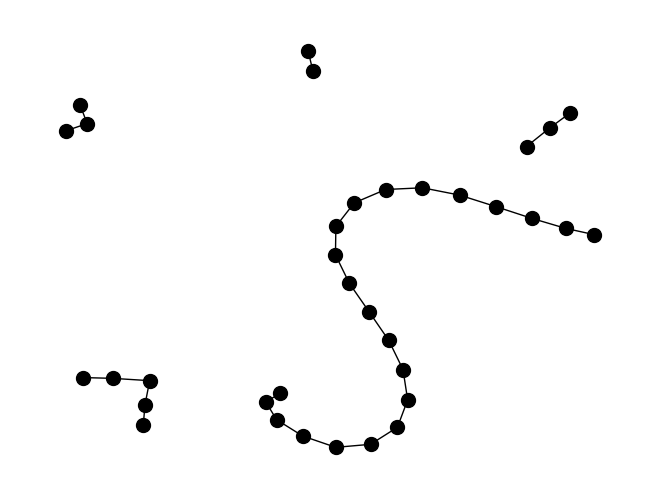

In [84]:
nx.draw(g, node_size = 100, node_color = 'black')